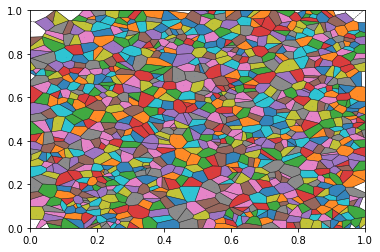

In [14]:
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.default_rng()
points = rng.random((1000,2))
from scipy.spatial import Voronoi, voronoi_plot_2d
vor = Voronoi(points)
fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='black',
                line_width=0.5, line_alpha=1, point_size=0.1)
#trim the axes
plt.xlim(0,1)
plt.ylim(0,1) 
# color the regions with a colormap
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon), alpha=0.9)

plt.show()

RuntimeError: The animation function must return a sequence of Artist objects.

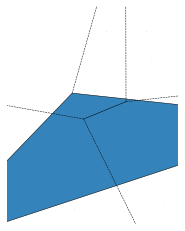

In [21]:
# make a animation simulating the growth of the voronoi diagram
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
from matplotlib import rc
rc('animation', html='jshtml')
fig = plt.figure()
ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
ax.set_aspect('equal')
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])
# start with a single point
points = rng.random((4,2))
vor = Voronoi(points)
# plot initial Voronoi diagram
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black',
                line_width=0.5, line_alpha=1, point_size=0.1)
# function to update the Voronoi diagram
def update(i):
    # add a new point
    points = rng.random((i+4,2))
    # update the Voronoi diagram
    vor = Voronoi(points)
    # plot the new Voronoi diagram
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='black',
                    line_width=0.5, line_alpha=1, point_size=0.1)
    # color the regions with a colormap
    for region in vor.regions:
        if not -1 in region:
            polygon = [vor.vertices[i] for i in region]
            plt.fill(*zip(*polygon), alpha=0.9)

    return ax
# create the animation
anim = animation.FuncAnimation(fig, update, frames=10, interval=100, blit=True)

